(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

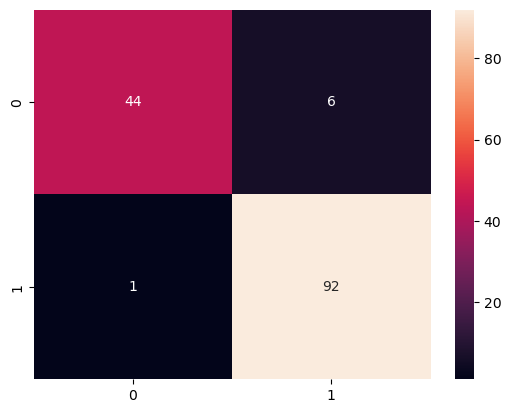

In [ ]:
#HW_04
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.data.shape)

print(cancer.target)

from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 11)

print(f"X Train: {X_train.shape}, X Test: {X_test.shape}")
print(f"Y Train: {y_train.shape}, Y Test: {y_test.shape}")

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X = X_train, y = y_train)

predicted = model.predict(X = X_test)
expected = y_test

print(f"Predicted: \n{predicted}")

print(f"Estimator Score: {model.score(X_test, y_test):.2f}")

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print(f"Confusion Matrix: \n{confusion}")

from sklearn.metrics import classification_report

names = [str(cancer) for cancer in cancer.target_names]

print(classification_report(expected, predicted, target_names = names))

import seaborn as sns

axes = sns.heatmap(confusion, annot = True)

print(axes)

from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, random_state = 11, shuffle = True)

from sklearn.model_selection import cross_val_score

score = cross_val_score(estimator = model, X = cancer.data, y = cancer.target, cv = kfold)

print(f"K-Fold Cross-Validaiton Score: \n{score}")

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 

estimators = {'GaussianNB' : GaussianNB(), 
            'LogisticRegression' : LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter = 10000),
            'SVC' : SVC(gamma = 'scale'),
            'KNeighborsClassifier' : KNeighborsClassifier()}


for model_name, model in estimators.items():
    scores = cross_val_score(estimator = model, X = cancer.data, y = cancer.target, cv = kfold, scoring = 'r2')
    print(f'{model_name:>16} mean of r2 scores = {scores.mean():.3f}')

